In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

In [3]:
# 데이터 불러오기
DATA_IN_PATH = 'data_in/KOR'
DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, 'NER', "train.tsv")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, 'NER', "test.tsv")
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, 'NER', "label.txt")

In [6]:
def read_file(input_path):
    """Read tsv file, and return words and label as list"""
    with open(input_path, 'r', encoding="utf-8") as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split('\t')
            sentences.append(split_line[0])
            labels.append(split_line[1])

        return sentences, labels

train_sentences, train_labels = read_file(DATA_TRAIN_PATH)
test_sentences, test_labels = read_file(DATA_TEST_PATH)
ner_sentences = train_sentences + test_sentences
ner_labels = train_labels + test_labels

ner_dict = {"sentence": ner_sentences, "label":ner_labels}
ner_df = pd.DataFrame(ner_dict)
ner_df.head(10)

,sentence,label
0,"금석객잔 여러분, 감사드립니다 .",ORG-B O O O
1,이기범 한두 쪽을 먹고 10분 후쯤 화제인을 먹는 것이 좋다고 한다 .,PER-B O O O TIM-B TIM-I CVL-B O O O O O
2,7-8위 결정전에서 김중배 무스파타(샌안토니오)가 참은 법국을 누르고 유럽축구선수권...,EVT-B EVT-I PER-B PER-I O LOC-B O EVT-B CVL-B O O
3,스코틀랜드의 한 마을에서 보통하게 살고 있다는 이 기혼 남성의 시조가 유튜브 등에서...,LOC-B NUM-B NUM-I O O O O O O O O O O O O O CV...
4,보니까 저 옆에 사조가 있어요 .,O O O O O O
5,24회 최경운호의 좌익선상 28루타로 포문을 연 한화는 후속 서동원이 적시타를 날려...,NUM-B PER-B O NUM-B O O ORG-B O PER-B O O O O O
6,바둑선수가 묘하게 닮았는데요 .,CVL-B O O O
7,▲ '新플레이메이커' NO.7 박하성 - 1경기 30골30도움공수 운동경기가 풀리지...,O CVL-B NUM-B PER-B O NUM-B NUM-B O O O O O O ...
8,우려는 비현실이 됐다 .,O O O O
9,(이석무 귀재 smlee@mydaily.co.kr),PER-B CVL-B TRM-B


In [7]:
print(f"전체 ner_data 개수: {len(ner_df)}")

전체 ner_data 개수: 90000


In [9]:
train_set = pd.Series(ner_df['sentence'].tolist())
print(f"유일한 총 문장 수: {len(np.unique(train_set))}")
print(f"반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}")

유일한 총 문장 수: 88703
반복해서 나타나는 문장의 수: 288


Text(0, 0.5, 'Number of sentence')

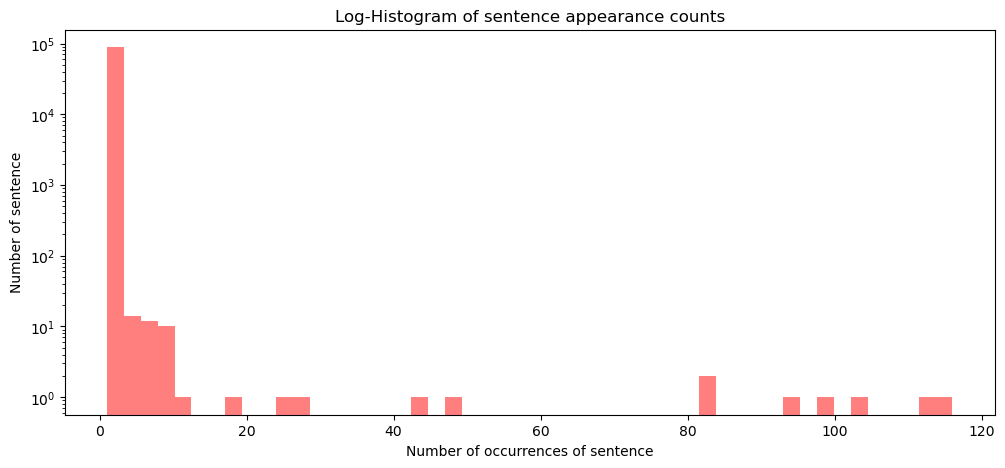

In [11]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log')
# 그래프 제목
plt.title('Log-Histogram of sentence appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of sentence')

In [12]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 116
중복 최소 개수: 1
중복 평균 개수: 1.01
중복 표준편차: 0.92
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x31efa4150>,
 'caps': [<matplotlib.lines.Line2D at 0x31efcd750>,
 'boxes': [<matplotlib.lines.Line2D at 0x31ef98e50>],
 'medians': [<matplotlib.lines.Line2D at 0x320470550>],
 'fliers': [<matplotlib.lines.Line2D at 0x31efdfa10>],
 'means': [<matplotlib.lines.Line2D at 0x320472690>]}

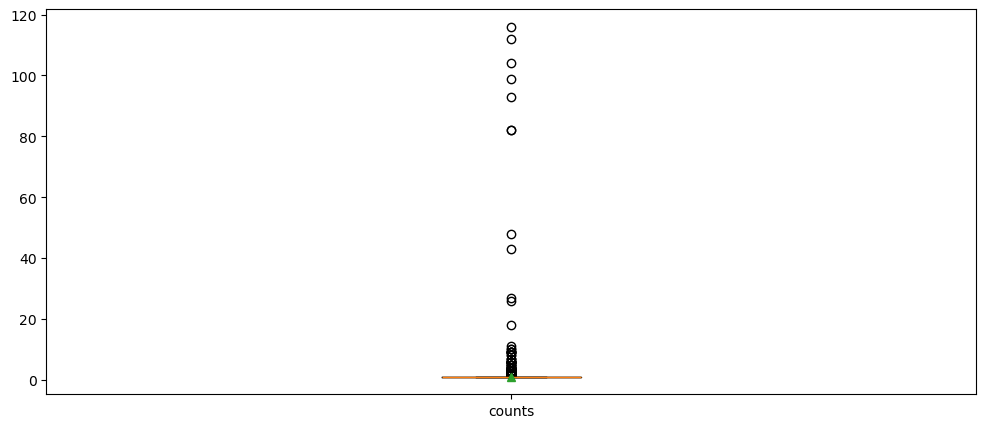

In [19]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [20]:
train_length = train_set.apply(len)

In [21]:
train_set[0]

'금석객잔 여러분, 감사드립니다 .'

In [22]:
train_length

0         18
1         39
2         60
3        125
4         18
        ... 
89995     19
89996     62
89997     22
89998     54
89999     50
Length: 90000, dtype: int64

In [23]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 1162
문장 길이 평균 값: 50.90
문장 길이 표준편차: 34.15
문장 길이 중간 값: 43.0
문장 길이 제 1 사분위: 29.0
문장 길이 제 3 사분위: 63.0


Text(0, 0.5, 'Probability')

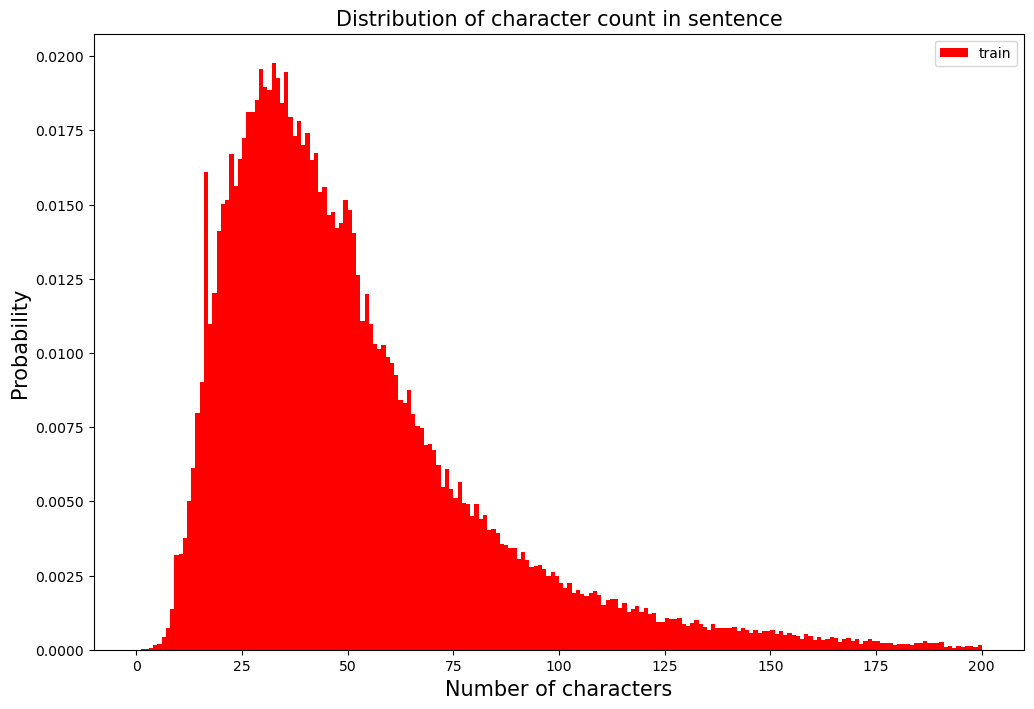

In [24]:
# 단어 빈도
plt.figure(figsize=(12, 8))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x31f653290>,
 'caps': [<matplotlib.lines.Line2D at 0x31f65e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x31f5c05d0>],
 'medians': [<matplotlib.lines.Line2D at 0x31f664d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x31f667710>],
 'means': [<matplotlib.lines.Line2D at 0x31f6664d0>]}

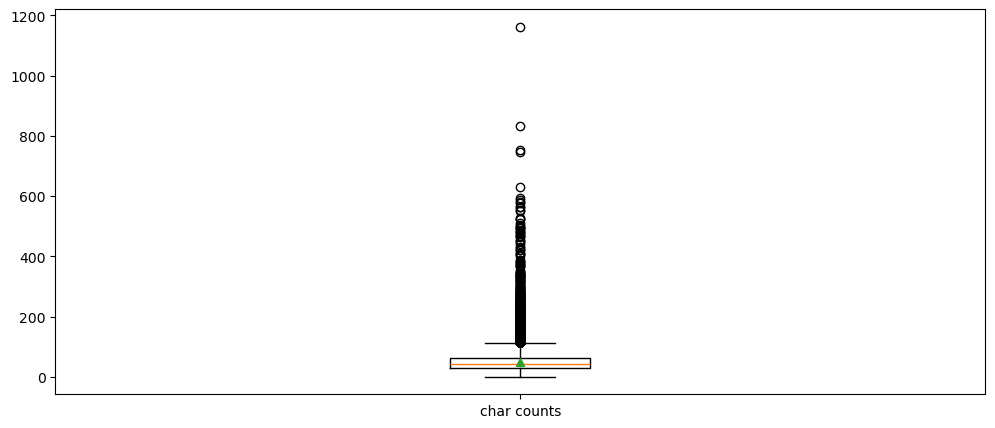

In [25]:
plt.figure(figsize = (12, 5))

plt.boxplot(train_length, 
            labels= ['char counts'],
            showmeans = True)

In [26]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

# 문장 단어 개수 최대 값: 175
# 문장 단어 개수 평균 값: 11.81
# 문장 단어 개수 표준편차: 7.03
# 문장 단어 개수 중간 값: 10.0
# 문장 단어 개수 제 1 사분위: 7.0
# 문장 단어 개수 제 3 사분위: 15.0
# 문장 단어 개수 99 퍼센트: 35.0

문장 단어 개수 최대 값: 175
문장 단어 개수 평균 값: 11.82
문장 단어 개수 표준편차: 7.03
문장 단어 개수 중간 값: 10.0
문장 단어 개수 제 1 사분위: 7.0
문장 단어 개수 제 3 사분위: 15.0
문장 단어 개수 99 퍼센트: 35.0


Text(0, 0.5, 'Probability')

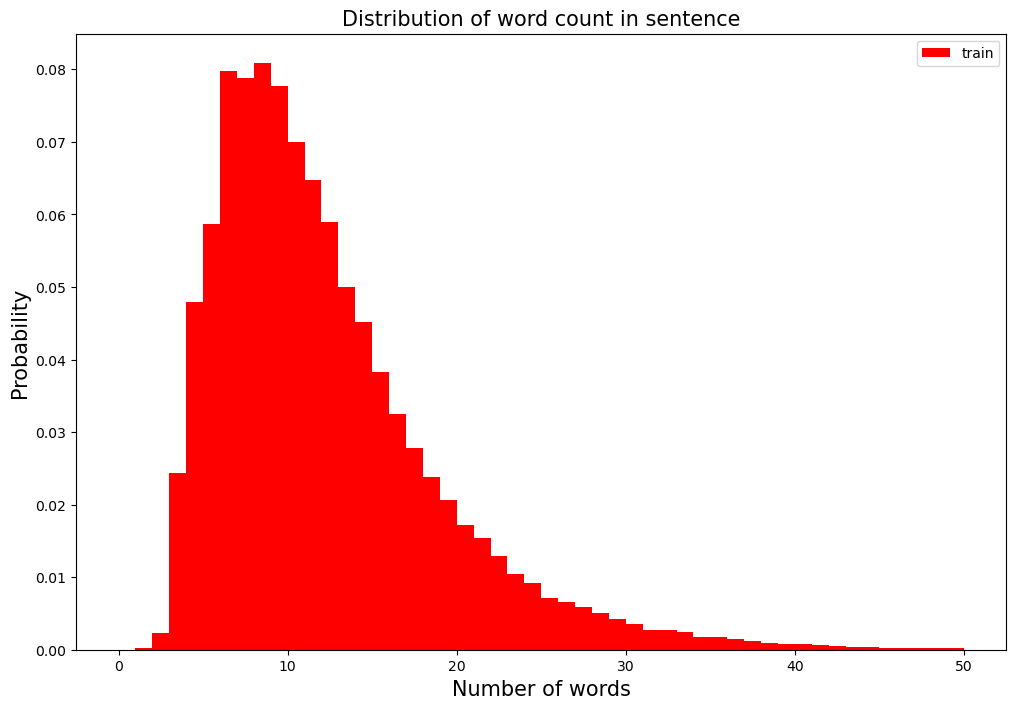

In [30]:
# 문장 빈도
plt.figure(figsize=(12, 8))
plt.hist(train_word_counts, bins=50, range= [0, 50], facecolor='r', density = True, label='train')
plt.title("Distribution of word count in sentence", fontsize = 15)
plt.legend()
plt.xlabel('Number of words', fontsize =15)
plt.ylabel('Probability', fontsize =15)

{'whiskers': [<matplotlib.lines.Line2D at 0x323a6b590>,
 'caps': [<matplotlib.lines.Line2D at 0x323a78750>,
 'boxes': [<matplotlib.lines.Line2D at 0x323887ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x323a79890>],
 'fliers': [<matplotlib.lines.Line2D at 0x323a44cd0>],
 'means': [<matplotlib.lines.Line2D at 0x323a7a0d0>]}

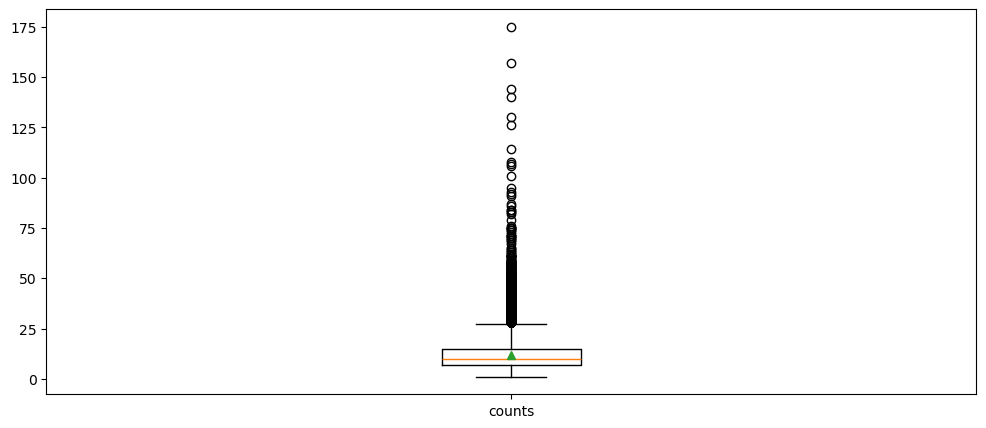

In [31]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [36]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 2.24%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 84.92%
첫 글자가 대문자 인 문장: 2.87%
대문자가있는 문장: 16.65%
숫자가있는 문장: 41.61%


## Tokenizer cased

In [42]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir = "bert_ckpt", do_lower_case = False)

/opt/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [44]:
train_bert_token_counts = train_set.apply(lambda x:len((tokenizer.tokenize(x))))

In [45]:
train_bert_token_counts

0        13
1        23
2        44
3        78
4        12
         ..
89995    12
89996    41
89997    13
89998    38
89999    30
Length: 90000, dtype: int64

Text(0, 0.5, 'Probability')

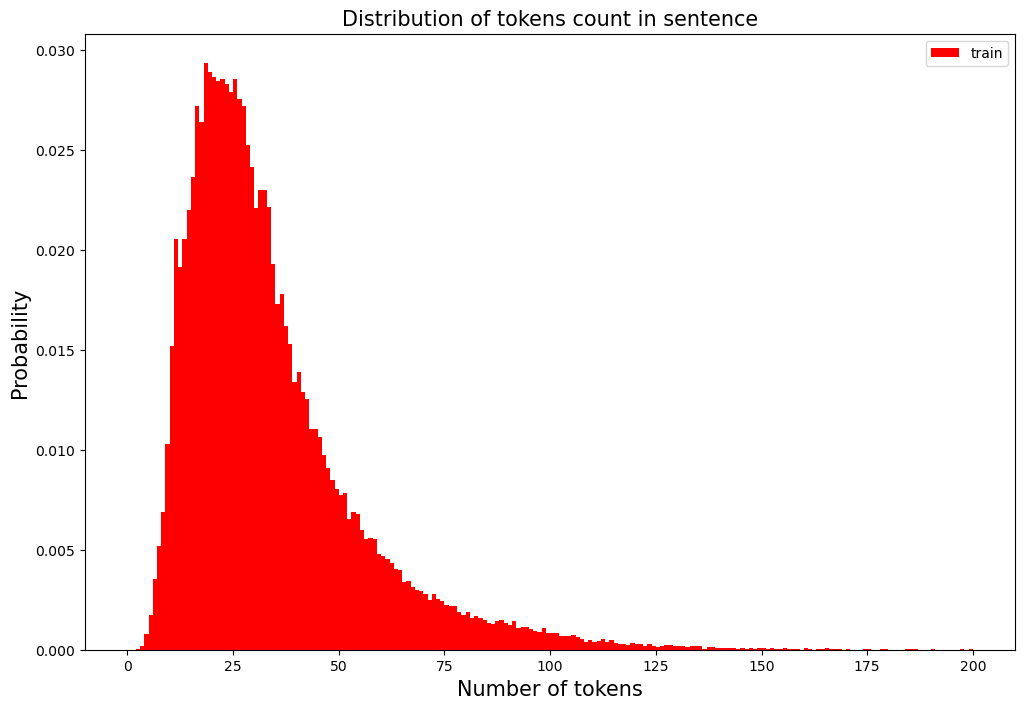

In [46]:
plt.figure(figsize=(12, 8))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [47]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 850
문장 tokens 개수 평균 값: 33.62
문장 tokens 개수 표준편차: 22.76
문장 tokens 개수 중간 값: 28.0
문장 tokens 개수 제 1 사분위: 19.0
문장 tokens 개수 제 3 사분위: 41.0
문장 tokens 개수 99 퍼센트: 111.0


{'whiskers': [<matplotlib.lines.Line2D at 0x314569750>,
 'caps': [<matplotlib.lines.Line2D at 0x31456abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x312f39b90>],
 'medians': [<matplotlib.lines.Line2D at 0x31456bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x314578c50>],
 'means': [<matplotlib.lines.Line2D at 0x314578490>]}

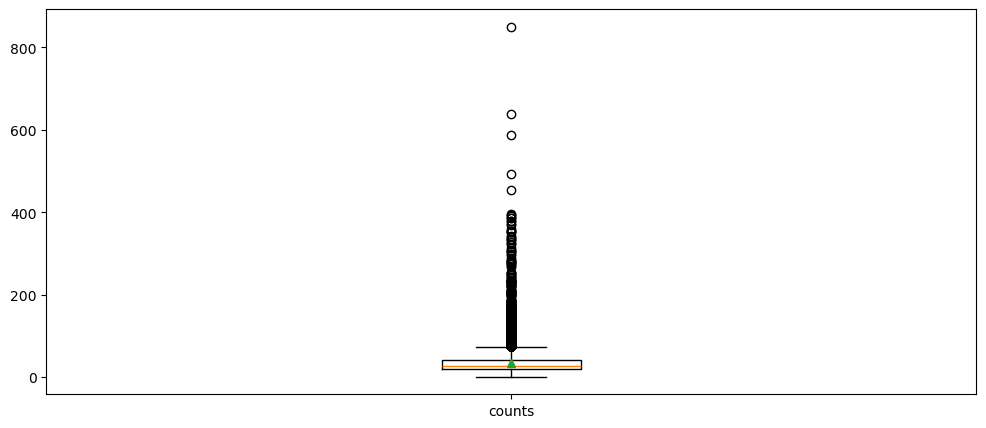

In [48]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)